In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img  = nib.load('/Users/ata/Desktop/vision/BLG453/term project/part4/V.nii').dataobj
gt = nib.load('/Users/ata/Desktop/vision/BLG453/term project/part4/V_seg.nii').dataobj

In [53]:
def dice_score(seg,gt,eps = 0.0000001):
    dice = ((np.sum(seg[gt==1])*2.0)+eps) / (np.sum(seg) + np.sum(gt)+eps)
    return dice
def seed_selector(img,th = 10):
    seeds=[]
    w = 10
    h = 20
    w_size =10
    for i in range (w_size) :
        window = img[h*(i):h*(i+1),w*(i):w*(i+1)]
        temp = np.sum(window)
        if temp > th:            
            inds = np.where(window == 255)
            y = inds[0][0]+ (h*(i)) 
            x = inds[1][0]+ (w*(i)) 
            seeds.append(Point(y,x))
    return seeds

In [4]:
gt = np.array(gt)
for i in range(img.shape[2]):
    if i ==0:
        a = gt[:,:,i].flatten()
    else :
        a = np.concatenate((a,gt[:,:,i].flatten()),axis = None)


In [47]:
import numpy as np
import cv2

class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

 def getX(self):
  return self.x
 def getY(self):
  return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
 return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
 if p != 0:
  connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
     Point(0, 1), Point(-1, 1), Point(-1, 0)]
 else:
  connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
 return connects

def regionGrow(img,seeds,thresh,p = 0):
 height, weight = img.shape
 seedMark = np.zeros(img.shape)
 seedList = []
 for seed in seeds:
  seedList.append(seed)
 label = 1
 connects = selectConnects(p)
 while(len(seedList)>0):
  currentPoint = seedList.pop(0)

  seedMark[currentPoint.x,currentPoint.y] = label
  for i in range(4):
   tmpX = currentPoint.x + connects[i].x
   tmpY = currentPoint.y + connects[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
   if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
    seedMark[tmpX,tmpY] = label
    seedList.append(Point(tmpX,tmpY))
 return seedMark

'''den = np.uint8(img[:,:,50]*255)
dst = cv2.bilateralFilter(den,9,100,100)
dst = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)[1]

seeds = deneme
binaryImg = regionGrow(dst,seeds,40)'''



'den = np.uint8(img[:,:,50]*255)\ndst = cv2.bilateralFilter(den,9,100,100)\ndst = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)[1]\n\nseeds = deneme\nbinaryImg = regionGrow(dst,seeds,40)'

In [48]:
label_list = []
for i in range(img.shape[2]):
    den = np.uint8(img[:,:,i]*255)
    dst = cv2.bilateralFilter(den,9,100,100)
    dst = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY)[1]
    seeds = seed_selector(dst)
    if seeds == []:        
        labels = np.zeros(dst.shape) #if empty         
    else:
        labels = regionGrow(dst,seeds,40)
    if i ==0:
        b = labels.flatten()
    else :
        b = np.concatenate((b,labels.flatten()),axis = None)
    label_list.append(labels)

In [49]:
dice_score(a,b)

0.885912901247422

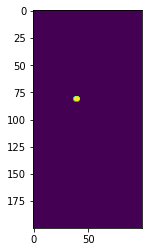

In [50]:
plt.imshow(gt[:,:,55])

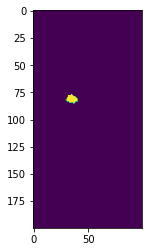

In [52]:
plt.imshow(label_list[55])